# Approximation d'une fonction par réseau de neurones

## <span style='color:blue'>  1. Fonction d'une variable réelle </span>

###  <span style='color:red'> 1-1. Données </span>

Le but de cette présentation est d’approcher la fonction f ci-dessous:

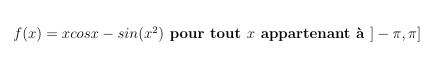

de repreprésentation graphique

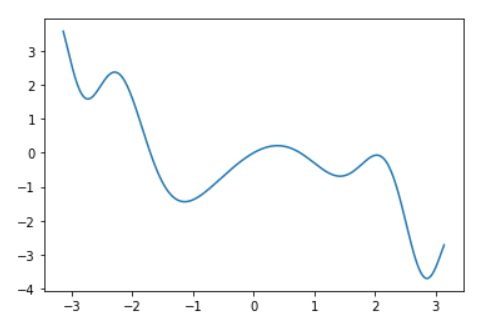


à l'aide du réseau de neurones ci-dessous après avoir construit et calculé les poids de ce dernier

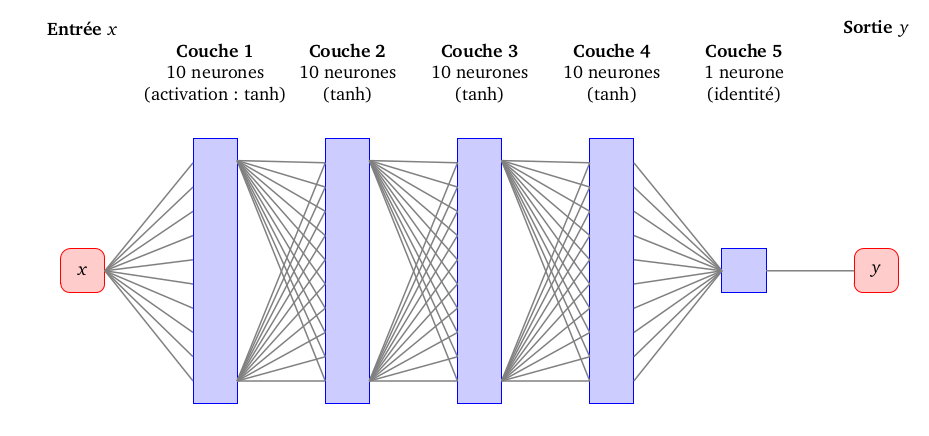

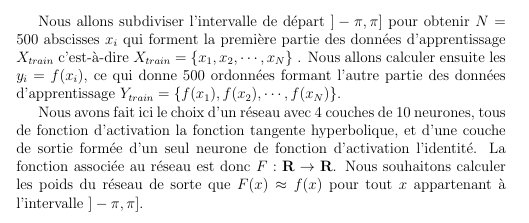

### <span style = 'color:red' >1-2. Programmes</span>

#### Les bibliothèques nécessaires

In [105]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import math

#### Définition de la fonction à approcher

In [106]:
def f(x):
    return x*np.cos(x)-np.sin(x**2)

#### L'ensemble des éléments de l'entrainement du réseau

In [107]:
a, b = -math.pi, math.pi
N = 500 #taille des données
X = np.linspace(a, b, N)# intervalle [a,b]
Y = f(X)
X_train = X.reshape(-1,1) # abscisses
Y_train = Y.reshape(-1,1) # ordonnées

#### Définition du réseau de neuronnes

In [108]:
modele = Sequential()
p = 10
modele.add(Dense(p, input_dim=1, activation= 'tanh'))
modele.add(Dense(p, activation= 'tanh'))
modele.add(Dense(p, activation= 'tanh'))
modele.add(Dense(p, activation= 'tanh'))
modele.add(Dense(1, activation= 'linear'))

#### Méthode de gradient: « adam »

In [109]:
modele.compile(loss= 'mean_squared_error' , optimizer='adam', metrics=['accuracy'])
print(modele.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 10)                20        
                                                                 
 dense_36 (Dense)            (None, 10)                110       
                                                                 
 dense_37 (Dense)            (None, 10)                110       
                                                                 
 dense_38 (Dense)            (None, 10)                110       
                                                                 
 dense_39 (Dense)            (None, 1)                 11        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________
None


#### Apprentissage par le réseau, affichage de la fonction f (en bleu) et de l'approximation F (en rouge) suivant le nombre d'epochs

In [99]:
def evaluation_appromation(nombre_epochs):
    history = modele.fit(X_train, Y_train, epochs = nombre_epochs, batch_size = N, verbose= 0)
    Y_predict = modele.predict(X_train)
    plt.plot(X_train, Y_train, color= 'blue' )
    plt.plot(X_train, Y_predict, color= 'red' )
    plt.title("epochs = {}".format(nombre_epochs))
    plt.show()

16/16 [==============================] - 0s 2ms/step


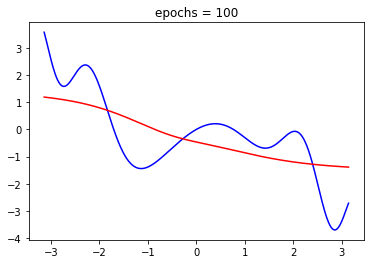

16/16 [==============================] - 0s 2ms/step


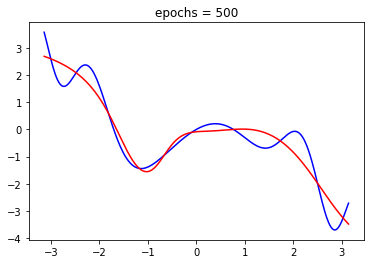

16/16 [==============================] - 0s 2ms/step


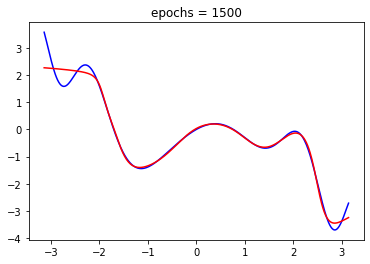

16/16 [==============================] - 0s 2ms/step


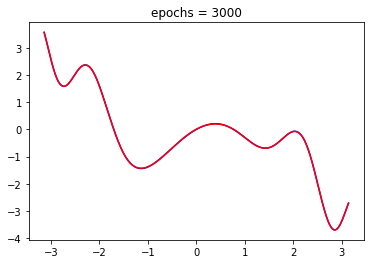

16/16 [==============================] - 0s 2ms/step


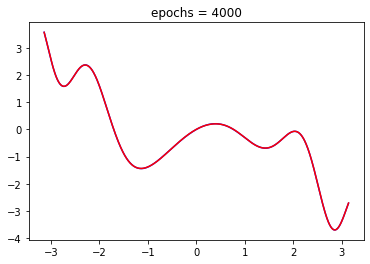

In [100]:
for nombre_epochs in [100, 500, 1500, 3000, 4000]: evaluation_appromation(nombre_epochs)

### <span style = 'color:red' >1-3. Conclusion </span>

In [110]:
history = modele.fit(X_train, Y_train, epochs = nombre_epochs, batch_size = N,verbose = 0)

Text(0.5, 1.0, 'Précision en fonction de epochs')

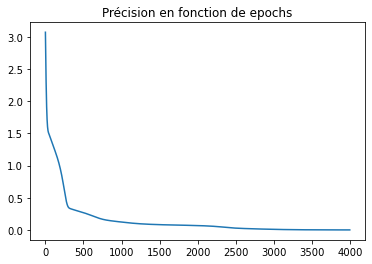

In [111]:
plt.plot(history.history['loss'])
plt.title("Précision en fonction de epochs")

Il ressort que en utilisant epochs supérieur ou égal 3500 dans les paramètres d'apprentissage 
, on obtient 
une approximation de la fonction f avec de notre réseau de neurones avec une erreur 
proche de 0
